In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('file 4.csv')

In [4]:
df.head(5)

Date State       Region  Confirmed  Deaths  Recovered
0  4/29/2020   NaN  Afghanistan       1939      60        252
1  4/29/2020   NaN      Albania        766      30        455
2  4/29/2020   NaN      Algeria       3848     444       1702
3  4/29/2020   NaN      Andorra        743      42        423
4  4/29/2020   NaN       Angola         27       2          7

In [5]:
df.tail(5)

Date     State          Region  Confirmed  Deaths  Recovered
316  4/29/2020   Wyoming              US        545       7          0
317  4/29/2020  Xinjiang  Mainland China         76       3         73
318  4/29/2020     Yukon          Canada         11       0          0
319  4/29/2020    Yunnan  Mainland China        185       2        181
320  4/29/2020  Zhejiang  Mainland China       1268       1       1263

In [6]:
df.shape

(321, 6)

In [7]:
df.describe()

Confirmed        Deaths      Recovered
count     321.000000    321.000000     321.000000
mean     9949.800623    709.152648    3030.277259
std     31923.853086   3236.162817   14364.870365
min         0.000000      0.000000       0.000000
25%       104.000000      2.000000       2.000000
50%       653.000000     12.000000      73.000000
75%      4655.000000    144.000000     587.000000
max    299691.000000  27682.000000  132929.000000

In [8]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      321 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [12]:
df.State.fillna('Unknown').inplace = True

In [13]:
df.head(5)

Date    State       Region  Confirmed  Deaths  Recovered
0  4/29/2020  Unknown  Afghanistan       1939      60        252
1  4/29/2020  Unknown      Albania        766      30        455
2  4/29/2020  Unknown      Algeria       3848     444       1702
3  4/29/2020  Unknown      Andorra        743      42        423
4  4/29/2020  Unknown       Angola         27       2          7

In [14]:
df.count()

Date         321
State        321
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [15]:
import seaborn as sns

In [16]:
import matplotlib.pyplot as plt

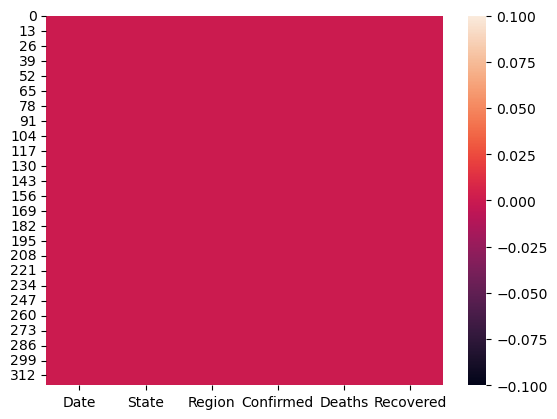

In [55]:
sns.heatmap(df.isnull())
plt.show()

Show the number of Confirmed, Deaths and Recovered cases in each Region.

In [23]:
df['Confirmed'].value_counts(normalize=True)

Confirmed
11       0.015576
16       0.012461
6        0.012461
18       0.012461
10       0.009346
           ...   
79685    0.003115
138      0.003115
1447     0.003115
641      0.003115
1268     0.003115
Name: proportion, Length: 282, dtype: float64

In [34]:
df.groupby('Region')[['Confirmed','Recovered']].sum()

Confirmed  Recovered
Region                                  
Afghanistan              1939        252
Albania                   766        455
Algeria                  3848       1702
Andorra                   743        423
Angola                     27          7
...                       ...        ...
West Bank and Gaza        344         71
Western Sahara              6          5
Yemen                       6          1
Zambia                     97         54
Zimbabwe                   32          5

[187 rows x 2 columns]

2) Remove all the records where the Confirmed Cases is Less Than 10.

In [40]:
df[~(df.Confirmed < 10)]

Date     State          Region  Confirmed  Deaths  Recovered
0    4/29/2020   Unknown     Afghanistan       1939      60        252
1    4/29/2020   Unknown         Albania        766      30        455
2    4/29/2020   Unknown         Algeria       3848     444       1702
3    4/29/2020   Unknown         Andorra        743      42        423
4    4/29/2020   Unknown          Angola         27       2          7
..         ...       ...             ...        ...     ...        ...
316  4/29/2020   Wyoming              US        545       7          0
317  4/29/2020  Xinjiang  Mainland China         76       3         73
318  4/29/2020     Yukon          Canada         11       0          0
319  4/29/2020    Yunnan  Mainland China        185       2        181
320  4/29/2020  Zhejiang  Mainland China       1268       1       1263

[304 rows x 6 columns]

. 3) In which Region, maximum number of Confirmed cases were recorded ?

In [45]:
df.groupby('Region').Confirmed.sum().sort_values(ascending = False).head(10)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Name: Confirmed, dtype: int64

 4) In which Region, minimum number of Deaths cases were recorded ?

In [46]:
df.groupby('Region').Deaths.sum().sort_values(ascending = True).head(10)

Region
Cambodia                    0
Bhutan                      0
Dominica                    0
Central African Republic    0
Eritrea                     0
Fiji                        0
Holy See                    0
Mozambique                  0
Macau                       0
Madagascar                  0
Name: Deaths, dtype: int64

5) How many Confirmed, Deaths & Recovered cases were reported from India till 29 April 2020 ?

In [49]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

In [51]:
df[df.Region == 'India']

Date    State Region  Confirmed  Deaths  Recovered
74 2020-04-29  Unknown  India      33062    1079       8437

6-A ) Sort the entire data wrt No. of Confirmed cases in ascending order.

In [52]:
df.sort_values(by = ['Confirmed'],ascending = True)

Date                         State          Region  Confirmed  \
284 2020-04-29                     Recovered          Canada          0   
285 2020-04-29                     Recovered              US          0   
203 2020-04-29  Diamond Princess cruise ship          Canada          0   
289 2020-04-29     Saint Pierre and Miquelon          France          1   
305 2020-04-29                         Tibet  Mainland China          1   
..         ...                           ...             ...        ...   
57  2020-04-29                       Unknown          France     165093   
168 2020-04-29                       Unknown              UK     165221   
80  2020-04-29                       Unknown           Italy     203591   
153 2020-04-29                       Unknown           Spain     236899   
265 2020-04-29                      New York              US     299691   

     Deaths  Recovered  
284       0      20327  
285       0     120720  
203       1          0  
289       0          0  
305       0          1  
..      ...        ...  
57    24087      48228  
168   26097          0  
80    27682      71252  
153   24275     132929  
265   23477          0  

[321 rows x 6 columns]

. 6-B ) Sort the entire data wrt No. of Recovered cases in descending order.

In [53]:
df.sort_values(by = ['Recovered'],ascending = True)

Date           State   Region  Confirmed  Deaths  Recovered
318 2020-04-29           Yukon   Canada         11       0          0
316 2020-04-29         Wyoming       US        545       7          0
302 2020-04-29       Tennessee       US      10366     195          0
298 2020-04-29  South Carolina       US       5882     231          0
299 2020-04-29    South Dakota       US       2373      13          0
..         ...             ...      ...        ...     ...        ...
80  2020-04-29         Unknown    Italy     203591   27682      71252
76  2020-04-29         Unknown     Iran      93657    5957      73791
61  2020-04-29         Unknown  Germany     161539    6467     120400
285 2020-04-29       Recovered       US          0       0     120720
153 2020-04-29         Unknown    Spain     236899   24275     132929

[321 rows x 6 columns]